# PC1 & PC2 - CLIMATE MODES

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import cartopy.crs as ccrs
import cartopy as cart
from pandas import DataFrame
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader

# Reading PCS

/tmp/ipykernel_192275/176368880.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  index2 = pd.date_range(start=pd.datetime(1901,7,1),periods=len(data5['pcs']),freq='AS-JUL')


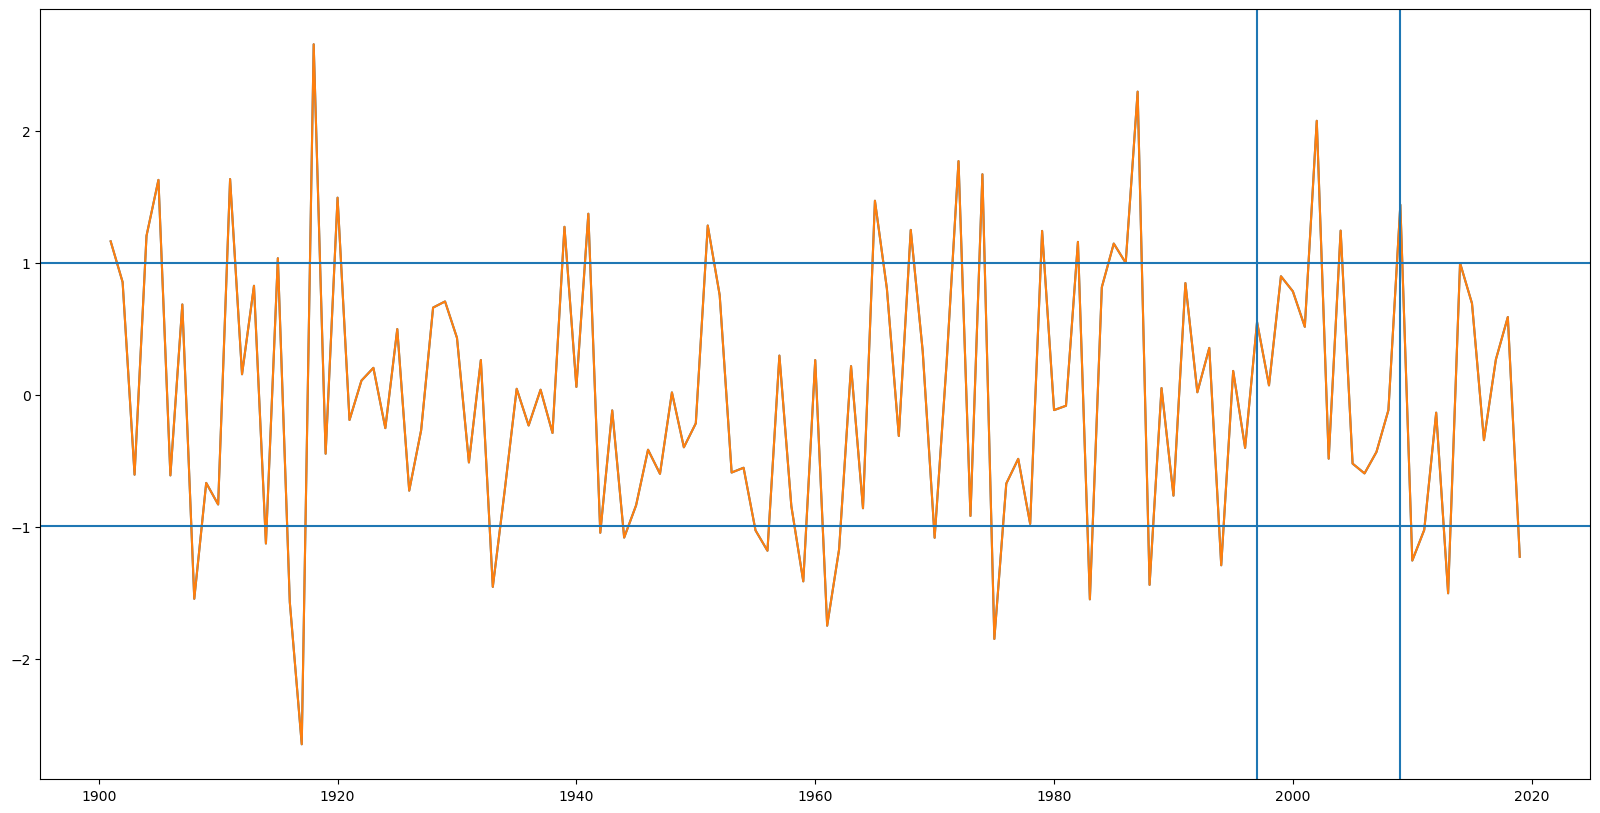

In [2]:
plt.figure(figsize=(20,10))
data5 = xr.open_dataset("/home/cccr/roxy/athira/pc.yearmean.detrend.nc")
pcs=data5.pcs.values
index2 = pd.date_range(start=pd.datetime(1901,7,1),periods=len(data5['pcs']),freq='AS-JUL')
pcs_df = pd.DataFrame(pcs, index = index2, columns=['IPC1','IPC2','pc3'])
plt.plot(np.arange(1901,2020,1),pcs_df.IPC1.values)
plt.plot(np.arange(1901,2020,1),data5.sel(mode=[0]).pcs.values.squeeze())
plt.axhline(pcs_df.IPC1.values.std())
plt.axhline(-1*pcs_df.IPC1.values.std())
plt.axvline(1997)
plt.axvline(2009)

In [3]:
std_pc1=pcs_df.IPC1.std()
std_pc1
pcs_df

,IPC1,IPC2,pc3
1901-07-01,1.160716,0.342881,0.099748
1902-07-01,0.852136,0.860975,-0.051509
1903-07-01,-0.607023,1.983223,-0.328053
1904-07-01,1.202513,-0.539508,0.113209
1905-07-01,1.626502,0.828349,0.749622
...,...,...,...
2015-07-01,0.690085,0.669869,1.149853
2016-07-01,-0.345643,-0.351865,-0.394493
2017-07-01,0.265642,1.012714,0.123024
2018-07-01,0.587311,-0.615343,0.121651


# PC1
    pc1>1std and pc1<1std

In [4]:
pc1=np.array(pcs_df.IPC1)

In [5]:
pc1_y=np.zeros(len(pc1))
a=np.where(pc1>std_pc1)[0]
an=np.where(pc1<std_pc1*-1)[0]
pc1_y[a]=1
pc1_y[an]=-1
p=np.where(pc1_y==1)[0]
n=np.where(pc1_y==-1)[0]
z=np.where(pc1_y==0)[0]

In [6]:
p,z,n

(array([  0,   3,   4,  10,  14,  17,  19,  38,  40,  50,  64,  67,  71,
         73,  78,  81,  84,  85,  86, 101, 103, 108]),
 array([  1,   2,   5,   6,   8,   9,  11,  12,  18,  20,  21,  22,  23,
         24,  25,  26,  27,  28,  29,  30,  31,  33,  34,  35,  36,  37,
         39,  42,  44,  45,  46,  47,  48,  49,  51,  52,  53,  56,  57,
         59,  62,  63,  65,  66,  68,  70,  72,  75,  76,  77,  79,  80,
         83,  88,  89,  90,  91,  92,  94,  95,  96,  97,  98,  99, 100,
        102, 104, 105, 106, 107, 111, 113, 114, 115, 116, 117]),
 array([  7,  13,  15,  16,  32,  41,  43,  54,  55,  58,  60,  61,  69,
         74,  82,  87,  93, 109, 110, 112, 118]))

# PC2
    pc2>1std and pc2<1std

In [7]:
std_pc2=pcs_df.IPC2.std()
std_pc2
pc2=np.array(pcs_df.IPC2)
b=np.where(pc2>std_pc2)[0]
b
bn=np.where(pc2<std_pc2*-1)[0]
bn

array([ 21,  22,  24,  33,  35,  38,  41,  42,  45,  47,  51,  60,  70,
        79,  84,  89,  93,  98, 102, 110])

In [8]:
pc2_y=np.zeros(len(pc2))
pc2_y[b]=1
pc2_y[bn]=-1
p_2=np.where(pc2_y==1)[0]
n_2=np.where(pc2_y==-1)[0]
z_2=np.where(pc2_y==0)[0]

In [9]:
n_2,z_2

(array([ 21,  22,  24,  33,  35,  38,  41,  42,  45,  47,  51,  60,  70,
         79,  84,  89,  93,  98, 102, 110]),
 array([  0,   1,   3,   4,   6,   7,   8,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  20,  23,  25,  26,  28,  29,  30,  31,  32,
         34,  36,  37,  39,  40,  43,  44,  46,  48,  49,  50,  52,  53,
         54,  55,  56,  57,  58,  59,  62,  63,  66,  67,  68,  69,  71,
         72,  73,  74,  75,  76,  77,  81,  83,  85,  86,  90,  91,  92,
         94,  96, 100, 101, 103, 105, 107, 111, 112, 113, 114, 115, 117,
        118]))

## significant difference

In [10]:
from scipy.stats import mannwhitneyu
def significance_composite(xr1,xr2,pvalue):
    lon = xr1.lon
    lat = xr1.lat
    sig_map = np.zeros((xr1.values.shape[1],xr1.values.shape[2]))
    for i in np.arange(len(lat)):
        for j in np.arange(len(lon)):
            data1 = xr1.values[:,i,j]
            data2 = xr2.values[:,i,j]
            if np.all(data2==data2[0]):
                continue
            elif any(np.isnan(data2)):
                continue
            else:
                stat, p = mannwhitneyu(data1, data2)  
            if p<pvalue:
                sig_map[i,j]=1.0
    
    sig_map[sig_map==0] = np.nan 
    
    sig_map_ds = xr.Dataset({'sig_map': (('lat','lon'), sig_map)}, coords={'latitude': xr1.lat,'longitude': xr1.lon})
    return sig_map_ds#,non_sig_map_ds

## SST

In [11]:
data=xr.open_dataset("/home/cccr/roxy/athira/biplot_detrended/HadISST_sst_modified.anom.detrend.nc")
sst=data.sst
lat=data.lat.values
lon=data.lon.values

def ismonth(month):
    return (month>=6) & (month<=9)

sst = sst.sel(time = ismonth(sst['time.month']))
sst_m=sst.groupby('time.year').mean(dim='time')
sst_1901_2019=sst_m.sel(year=slice('1901','2019'))

In [12]:
### pc1
sig_map_sst_pc1_p=significance_composite(sst_1901_2019[p,:,:],sst_1901_2019[z,:,:],0.05)
sig_map_sst_pc1_n=significance_composite(sst_1901_2019[n,:,:],sst_1901_2019[z,:,:],0.05)

### pc2
sig_map_sst_pc2_p=significance_composite(sst_1901_2019[p_2,:,:],sst_1901_2019[z_2,:,:],0.05)
sig_map_sst_pc2_n=significance_composite(sst_1901_2019[n_2,:,:],sst_1901_2019[z_2,:,:],0.05)

## HGT

In [13]:
data=xr.open_dataset("/home/cccr/roxy/athira/biplot_detrended/hgt.mon.mean.500.anom.jjas.yearmean.detrend.nc")
hgt=data.hgt
hgt_1901_2019=hgt.sel(time=slice('1901','2019'))

In [14]:
##pc1
sig_map_hgt_pc1_p=significance_composite(hgt_1901_2019[p[:-1],0,:,:],hgt_1901_2019[z[:-3],0,:,:],0.05)
sig_map_hgt_pc1_n=significance_composite(hgt_1901_2019[n[:-1],0,:,:],hgt_1901_2019[z[:-3],0,:,:],0.05)
## pc2
sig_map_hgt_pc2_p=significance_composite(hgt_1901_2019[p_2[:-1],0,:,:],hgt_1901_2019[z_2[:-3],0,:,:],0.05)
sig_map_hgt_pc2_n=significance_composite(hgt_1901_2019[n_2[:-1],0,:,:],hgt_1901_2019[z_2[:-3],0,:,:],0.05)

# ISMR

In [15]:
imd=xr.open_dataset('/home/cccr/roxy/athira/biplot_detrended/standardized_imd_jjas_yearly.detrend.nc')
imd_r=imd.rf

In [16]:
from scipy.stats import mannwhitneyu
def significance_composite(xr1,xr2,pvalue):
    lon = xr1.longitude
    lat = xr1.latitude
    sig_map = np.zeros((xr1.values.shape[1],xr1.values.shape[2]))
    for i in np.arange(len(lat)):
        for j in np.arange(len(lon)):
            data1 = xr1.values[:,i,j]
            data2 = xr2.values[:,i,j]

            if np.any(np.isnan(data2)):
                continue
            else:
                stat, p = mannwhitneyu(data1, data2)  
            if p<pvalue:
                sig_map[i,j]=1.0
    
#     sig_map[sig_map==0] = np.nan 
    
    sig_map_ds = xr.Dataset({'sig_map': (('lat','lon'), sig_map)}, coords={'latitude': xr1.latitude,'longitude': xr1.longitude})
    return sig_map_ds#,non_sig_map_ds

In [17]:
lat=imd_r.latitude.values
lon=imd_r.longitude.values
rain_1901_2019=imd_r.sel(time=slice('1901','2019'))

# ISMR-PC1

In [18]:
## pc1
sig_map_ds_rain_pc1_p=significance_composite(rain_1901_2019[p,0,:,:],rain_1901_2019[z,0,:,:],0.05)
sig_map_ds_rain_pc1_n=significance_composite(rain_1901_2019[n,0,:,:],rain_1901_2019[z,0,:,:],0.05)

## pc2
sig_map_ds_rain_pc2_p=significance_composite(rain_1901_2019[p_2,0,:,:],rain_1901_2019[z_2,0,:,:],0.05)
sig_map_ds_rain_pc2_n=significance_composite(rain_1901_2019[n_2,0,:,:],rain_1901_2019[z_2,0,:,:],0.05)


# Plotting Subplots

In [19]:
def rain_draw(pos,rain,sig_map_ds,ax,cmap1,title,cbar=False):
    mask=np.ones((rain[0,0,:,:].shape))
    mask[np.where(np.isnan(rain[0,0,:,:]))]=np.nan
#     ax = fig.add_subplot(gs[0,0],projection=ccrs.PlateCarree(central_longitude=0.0))
    fname='/home/cccr/roxy/panini/yang/era5_yang/Shape_file/India_Country_dcml_dgr.shp'
    shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                    ccrs.PlateCarree(), facecolor='none',edgecolor='k')
    ax.add_feature(shape_feature)
    fill=ax.contourf(rain[pos,0,:,:].longitude,rain[pos,0,:,:].latitude,
                (rain[pos,0,:,:].mean('time'))*mask, levels=np.arange(-2.,2.4,.4), cmap=cmap1,extend='both',
                                 add_colorbar=False, transform=ccrs.PlateCarree())
    hatch='xx'
    ax.contourf(rain[pos,0,:,:].longitude,rain[pos,0,:,:].latitude,
                 sig_map_ds['sig_map'],levels=[0,0.5,1],colors='none',hatches=[None,hatch,],transform = ccrs.PlateCarree())

    extent = [60, 100, 5, 40]
    ax.set_extent(extent,ccrs.PlateCarree())
    ax.set_xticks([60,80,100], crs=ccrs.PlateCarree())
    ax.set_yticks([10,20,30], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.set_title(title,  x=0.002, y=1.0, fontsize=22, weight="bold")
    ax.coastlines()
    ax.add_feature(shape_feature)
    if cbar:
        fig.subplots_adjust(right=0.87)
        cax = fig.add_axes([0.11, 0.09, 0.24, 0.010])
        cb = plt.colorbar(fill, cax=cax, orientation="horizontal", fraction=0.046, pad=0.2, shrink=1.0)
        cb.set_label(label=' Rain(mm/day)', size=20, weight='bold')
        cb.ax.tick_params(labelsize=14)
    
def sst_draw(pos,sst,sig_map_ds,ax,cmap2,title,cbar=False):
#     ax = fig.add_subplot(gs[0,1],projection=ccrs.Robinson(central_longitude=180))
    fill = sst[pos,:,:].mean(dim='year').plot.contourf(ax=ax, levels=np.arange(-0.4,0.5,.1), cmap=cmap2,extend='both',
                             add_colorbar=False, transform=ccrs.PlateCarree())
    hatch='xx'
    sig_map_ds['sig_map'].plot.contourf(ax=ax,  add_colorbar=False,levels=[0,0.5,1],colors='none',hatches=[None,hatch,],transform = ccrs.PlateCarree())
    ax.add_feature(cart.feature.LAND, zorder=100, edgecolor='k', facecolor='k')
    
#     extent = [0,360,-90, 90]
#     ax.set_extent(extent,ccrs.PlateCarree())
    ax.set_xticks([0,60,120,180,240,300,360], crs=ccrs.PlateCarree())
    ax.set_yticks([-90,-60,-30,0,30,60,90], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(title,  x=0.002, y=1.0, fontsize=22, weight="bold")
    if cbar:
        fig.subplots_adjust(right=0.87)
        cax = fig.add_axes([0.38, 0.09, 0.24, 0.010])
        cb = plt.colorbar(fill, cax=cax, orientation="horizontal", fraction=0.046, pad=0.2, shrink=1.0)
        cb.set_label(label=' SST  ($^{\circ}$C)', size=20, weight='bold')
        cb.ax.tick_params(labelsize=14)
    
def hgt_draw(pos,hgt,sig_map_ds,ax,cmap2,title,cbar=False):
#     ax = fig.add_subplot(gs[0,2],projection=ccrs.Robinson(central_longitude=180))
    hgt_pc1_lev_p=hgt[pos,:,:,:].mean(dim='level')
    hgt_pc1_timemean_p=hgt_pc1_lev_p.mean(dim='time')
    fill = hgt_pc1_timemean_p.plot.contourf(ax=ax, cmap=cmap3,levels=np.arange(-16,20,4), extend='both',
                                 add_colorbar=False, transform=ccrs.PlateCarree())
    hatch='xx'

    sig_map_ds['sig_map'].plot.contourf(ax=ax,  add_colorbar=False,levels=[0,0.5,1],colors='none',hatches=[None,hatch,],transform = ccrs.PlateCarree())
    
    
#     extent = [0,360,-90, 90]
#     ax.set_extent(extent,ccrs.PlateCarree())
    ax.set_xticks([0,60,120,180,240,300,360], crs=ccrs.PlateCarree())
    ax.set_yticks([-90,-60,-30,0,30,60,90], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.coastlines()
    ax.set_title(title,  x=0.002, y=1.0, fontsize=22, weight="bold")
    if cbar:
        fig.subplots_adjust(right=0.87)
        cax = fig.add_axes([0.65, 0.09, 0.24, 0.010])
        cb = plt.colorbar(fill, cax=cax, orientation="horizontal", fraction=0.046, pad=0.2, shrink=1.0)
        cb.set_label(label=' Geopotential height(m)', size=20, weight='bold')
        cb.ax.tick_params(labelsize=14)


/home/cccr/roxy/panini/anaconda3/envs/jgrjdm1/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)
/home/cccr/roxy/panini/anaconda3/envs/jgrjdm1/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)
/home/cccr/roxy/panini/anaconda3/envs/jgrjdm1/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)
/home/cccr/roxy/panini/anaconda3/envs/jgrjdm1/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)


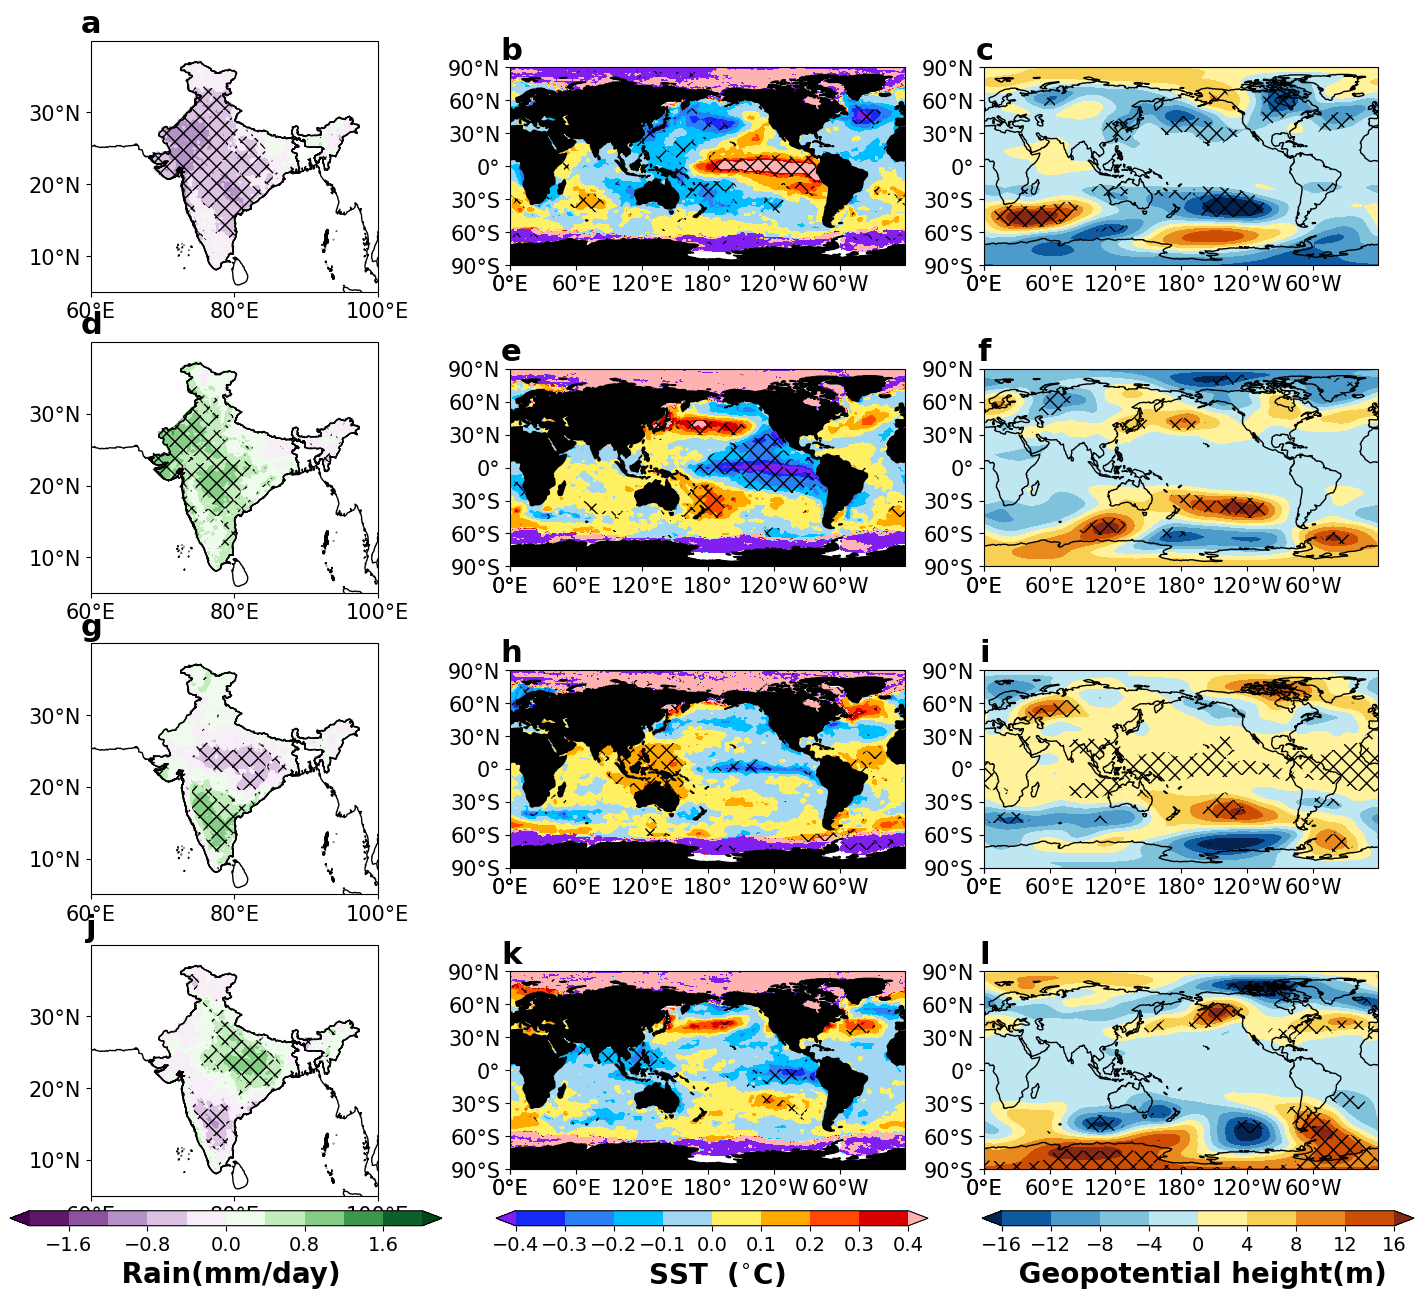

In [20]:
import matplotlib.gridspec as gridspec
import nclcmaps
plt.rcParams['font.size']=15
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(4,3)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
############################
cmap3 = nclcmaps.cmap('BlueYellowRed')
cmap2=nclcmaps.cmap('ncl_default')
cmap1 = nclcmaps.cmap('MPL_PRGn')

hatch='xx'

ax1 = fig.add_subplot(gs[0,0],projection=ccrs.PlateCarree(central_longitude=0.0))
rain_draw(p,rain_1901_2019,sig_map_ds_rain_pc1_p,ax1,cmap1,'a')
ax2 = fig.add_subplot(gs[1,0],projection=ccrs.PlateCarree(central_longitude=0.0))
rain_draw(n,rain_1901_2019,sig_map_ds_rain_pc1_n,ax2,cmap1,'d')
ax3 = fig.add_subplot(gs[2,0],projection=ccrs.PlateCarree(central_longitude=0.0))
rain_draw(p_2,rain_1901_2019,sig_map_ds_rain_pc2_p,ax3,cmap1,'g')
ax4 = fig.add_subplot(gs[3,0],projection=ccrs.PlateCarree(central_longitude=0.0))
rain_draw(n_2,rain_1901_2019,sig_map_ds_rain_pc2_n,ax4,cmap1,'j',cbar=True)

cen=180

ax5 = fig.add_subplot(gs[0,1],projection=ccrs.PlateCarree(central_longitude=cen))
sst_draw(p,sst_1901_2019,sig_map_sst_pc1_p,ax5,cmap2,'b')
ax6 = fig.add_subplot(gs[1,1],projection=ccrs.PlateCarree(central_longitude=cen))
sst_draw(n,sst_1901_2019,sig_map_sst_pc1_n,ax6,cmap2,'e')
ax7 = fig.add_subplot(gs[2,1],projection=ccrs.PlateCarree(central_longitude=cen))
sst_draw(p_2,sst_1901_2019,sig_map_sst_pc2_p,ax7,cmap2,'h')
ax8 = fig.add_subplot(gs[3,1],projection=ccrs.PlateCarree(central_longitude=cen))
sst_draw(n_2,sst_1901_2019,sig_map_sst_pc2_n,ax8,cmap2,'k',cbar=True)


ax9 = fig.add_subplot(gs[0,2],projection=ccrs.PlateCarree(central_longitude=cen))
hgt_draw(p[:-1],hgt_1901_2019,sig_map_hgt_pc1_p,ax9,cmap3,'c')
ax10 = fig.add_subplot(gs[1,2],projection=ccrs.PlateCarree(central_longitude=cen))
hgt_draw(n[:-1],hgt_1901_2019,sig_map_hgt_pc1_n,ax10,cmap3,'f')
ax11 = fig.add_subplot(gs[2,2],projection=ccrs.PlateCarree(central_longitude=cen))
hgt_draw(p_2[:-1],hgt_1901_2019,sig_map_hgt_pc2_p,ax11,cmap3,'i')
ax12 = fig.add_subplot(gs[3,2],projection=ccrs.PlateCarree(central_longitude=cen))
hgt_draw(n_2[:-1],hgt_1901_2019,sig_map_hgt_pc2_n,ax12,cmap3,'l',cbar=True)


# plt.savefig("/home/cccr/roxy/athira/enso_paper/figure6_climatemodes_detrended.png", bbox_inches='tight', pad_inches=0.5, dpi=200)
